In [23]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

Problem 1

In [6]:
def f():
    x=sy.symbols('x')
    expr=x**5+2*x**3-x-1
    f=sy.lambdify(x,expr)
    
    a=0.0
    b=1.0
    
    while abs(a-b)>.000001:
        x=(a+b)/2
        if f(x)==0:
            return x
        elif f(x)>0:
            b=x
        else:
            a=x
    
    return a

f()

0.8783884048461914

Problem 2

In [16]:
def Solver(coef_list):
    if len(coef_list)%2==1:
        raise Exception('please enter a coefficient list with an even number of terms')
    
    x=sy.symbols('x')
    expr=0
    for i in range(len(coef_list)):
        expr+=coef_list[i]*x**i
    f=sy.lambdify(x,expr)
    
    a=0
    b=0
    
    if coef_list[0]==0:
        return 0
    if coef_list[0]<0:
        a=0
        
        if coef_list[len(coef_list)-1]<0:
            k=0
            while f(k)<0:
                k-=10
            b=k
        if coef_list[len(coef_list)-1]>0:
            k=0
            while f(k)<0:
                k+=10
            b=k
    if coef_list[0]>0:
        b=0
        
        if coef_list[len(coef_list)-1]<0:
            k=0
            while f(k)>0:
                k+=10
            a=k
        if coef_list[len(coef_list)-1]>0:
            k=0
            while f(k)>0:
                k-=10
            a=k
    
    while abs(a-b)>.000001:
        x=(a+b)/2
        if f(x)==0:
            return x
        elif f(x)>0:
            b=x
        else:
            a=x
    
    return a

print('a)',Solver([4,-4,3,-3,-1,1]))
print('b)',Solver([0,-8000,800040,-4003.8,-19.981,0.1]))
print('c)',Solver([-2519.48,-251915,-12594100,165746,-714.13,1]))
print('d)',Solver([-.1,-1,1000,10000,.1,1]))

a) -2.000000476837158
b) 0
c) 314.1432374715805
d) 0.009999871253967285


Problem 3

In [18]:
def f():
    x=sy.symbols('x')
    expr=x**5+2*x**3-x-1
    f=sy.lambdify(x,expr)
    df=sy.lambdify(x,sy.diff(expr))
    
    a=5
    while abs(f(a))>.000001:
        a=-1*(f(a)-df(a)*a)/df(a)
    
    return a

f()

0.8783886413492273

Problem 4

In [20]:
def Newton(guess,expr):
    f=sy.lambdify(x,expr)
    df=sy.lambdify(x,sy.diff(expr))
    
    while abs(f(guess))>.000001:
        guess=-1*(f(guess)-df(guess)*guess)/df(guess)
    
    return guess

x=sy.symbols('x')
expr=x**5+2*x**3-x-1
Newton(5,expr)

0.8783886413492273

Problem 5

In [22]:
expr=sy.sin(x**2)+x**2-x-1
Newton(-1,expr)

-0.5008739333988766

Problem 6

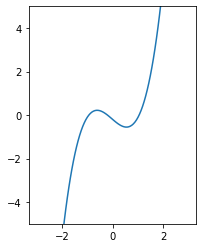

In [32]:
x=np.linspace(-3,3,100)
y=x**3+.1*x**2-x-.2

plt.plot(x,y)
plt.ylim(-5,5)
plt.gcf().set_size_inches(3,4)
plt.show()

In [38]:
x=sy.symbols('x')
expr=x**3+.1*x**2-x-.2

print('first solution, guess=-2,',Newton(-2,expr))
print('middle solution, guess=-.5,',Newton(-.5,expr))
print('last solution, guess=2,',Newton(2,expr))

first solution, guess=-2, -0.9384753087552652
middle solution, guess=-.5, -0.20435823901233416
last solution, guess=2, 1.0428336766282689
